<a href="https://colab.research.google.com/github/Tommy840602/SVM/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [266]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")
from sklearn import svm

In [267]:
df = pd.read_csv('/content/avocado.csv')

In [268]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [269]:
#EDA
df.shape

(18249, 14)

In [270]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [271]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [273]:
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.rename(index=str, columns={"4046" : "Small Hass", "4225" : "Large Hass","4770" : "XLarge Hass" })
df['Date'] =pd.to_datetime(df.Date)
df.sort_values(by=['Date'], inplace=True, ascending=True)
df.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


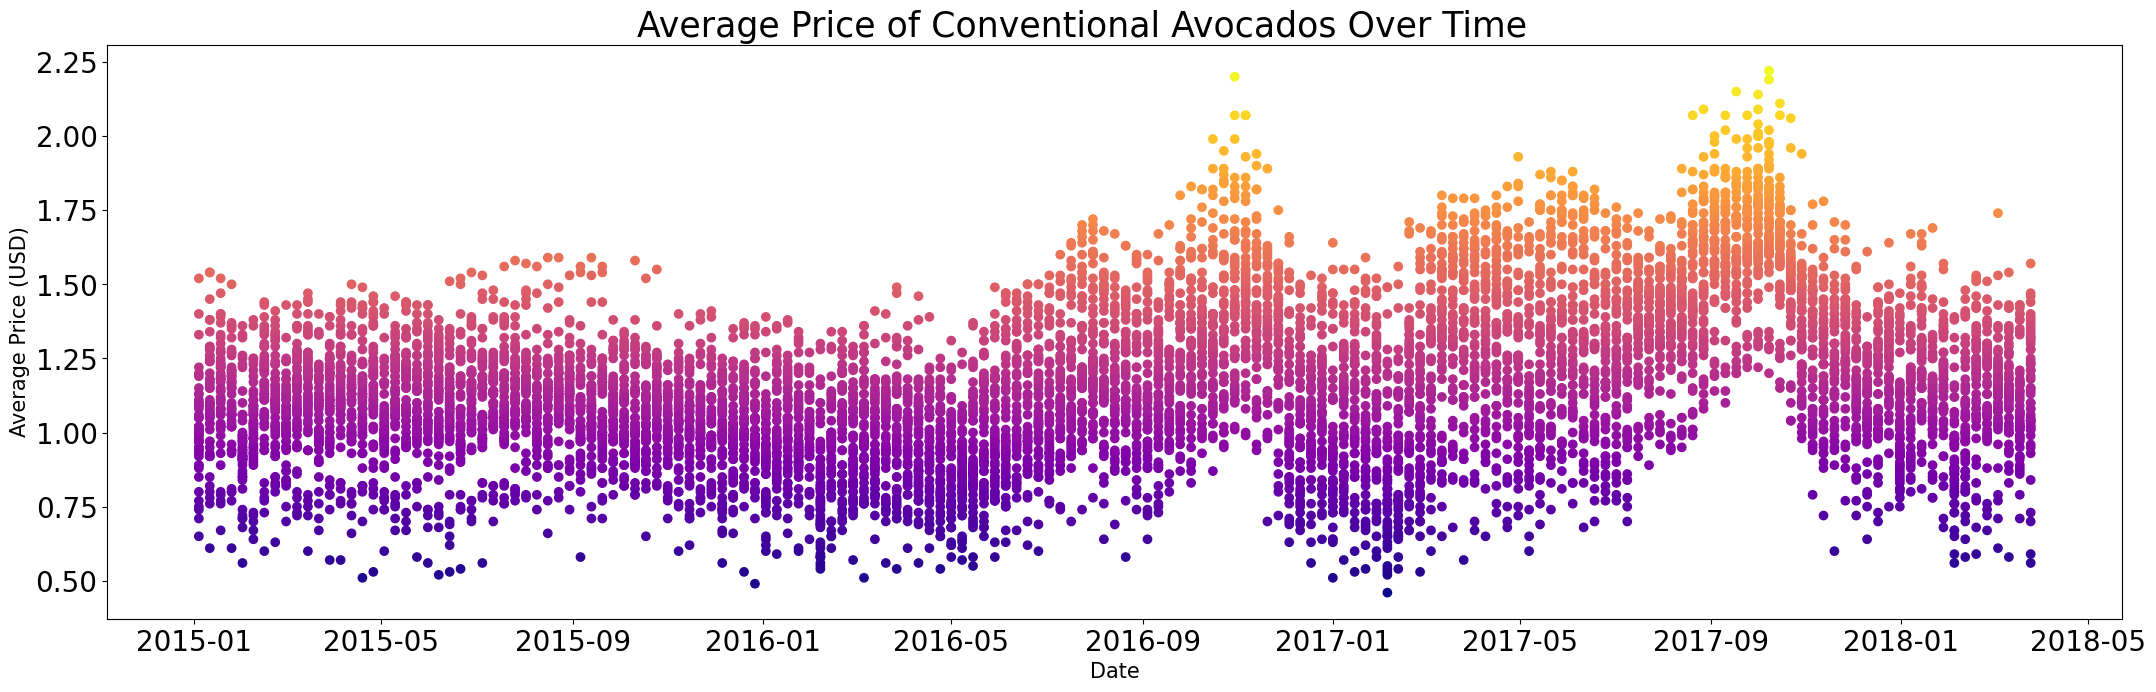

In [274]:
mask = df['type']== 'conventional'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

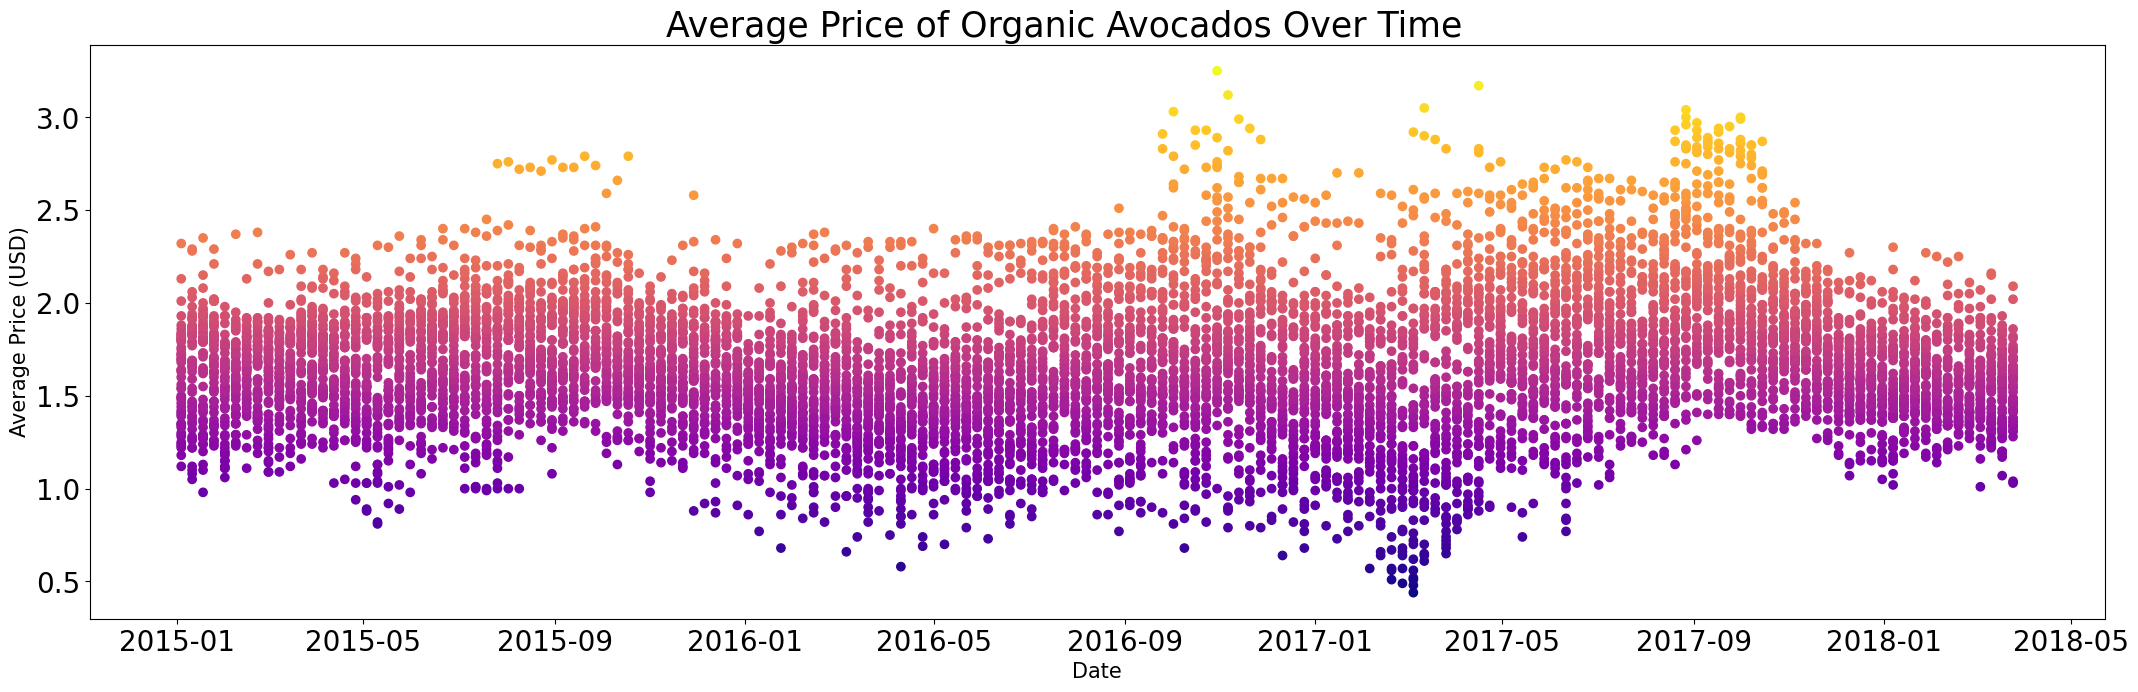

In [275]:
mask = df['type']== 'organic'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

In [276]:
df2 = df[['Date', 'AveragePrice']]
df2 = df2.set_index('Date')

weekly_df = df2.resample('W').mean()
w_df = weekly_df.reset_index().dropna()

w_df.sort_values(by=['Date'])
w_df.head()

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


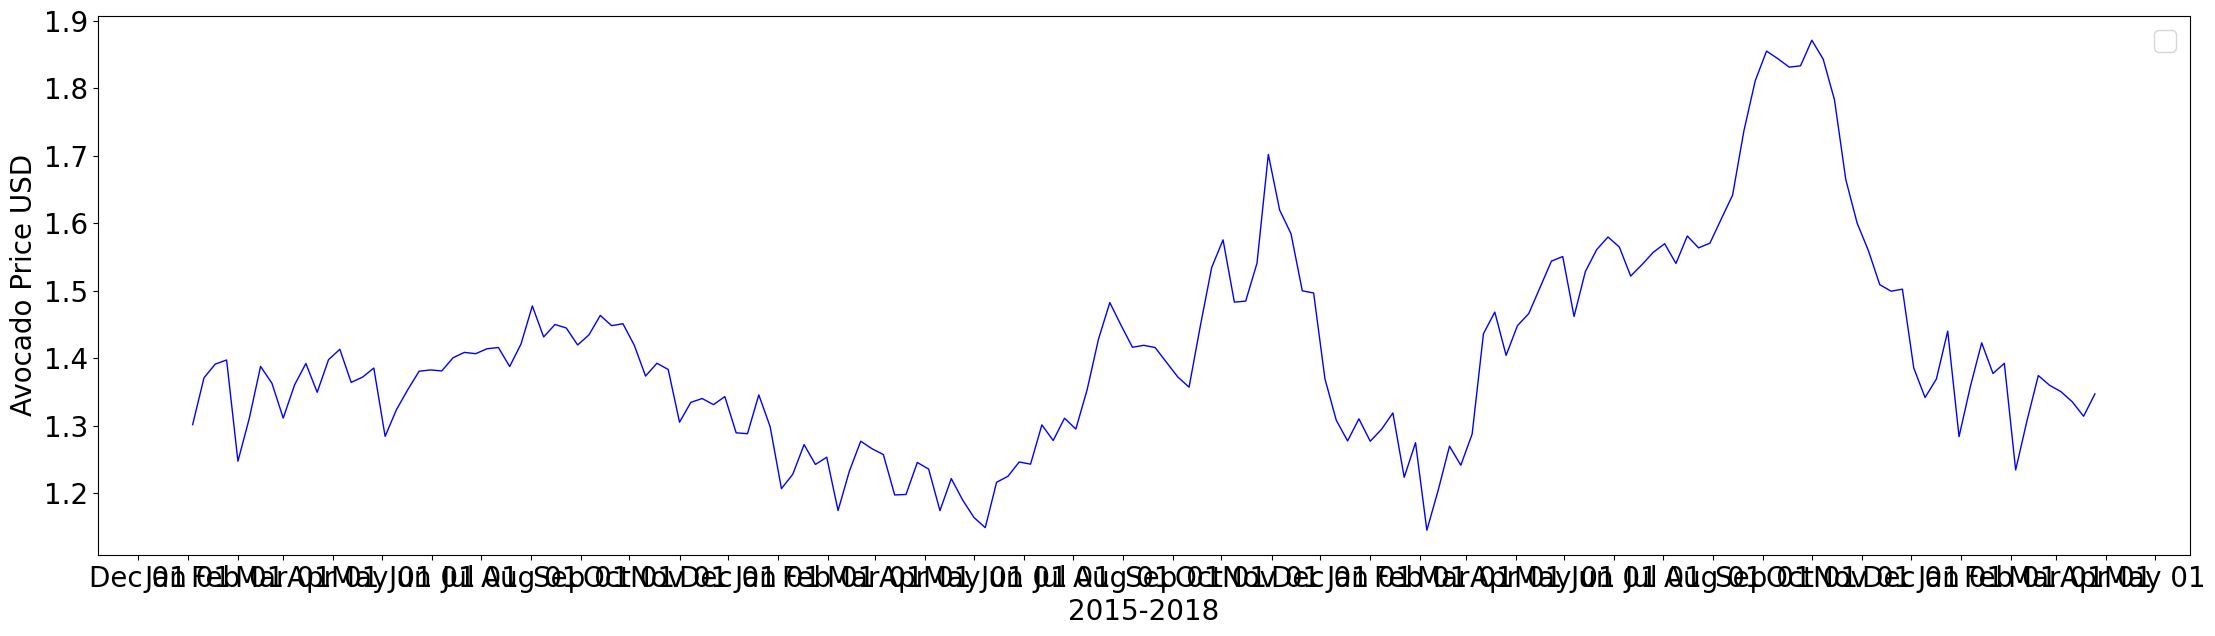

In [277]:
import matplotlib.dates as mdates

fig = plt.figure(figsize = (27, 7))
ax = plt.axes()

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.plot(w_df['Date'],w_df['AveragePrice'],color='b', linewidth=1)
plt.xlabel("2015-2018")
plt.ylabel("Avocado Price USD")
plt.legend()
plt.show()

In [297]:
from prophet import Prophet

w_df.columns = ['ds', 'y']
P=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=False,changepoint_range=1)
P.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
P.fit(w_df)
future = P.make_future_dataframe(freq='W', periods=4)  # Let's predict the next month's average prices
future.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrapk8al/6adzru8_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrapk8al/k6ak6ok2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80710', 'data', 'file=/tmp/tmpfrapk8al/6adzru8_.json', 'init=/tmp/tmpfrapk8al/k6ak6ok2.json', 'output', 'file=/tmp/tmpfrapk8al/prophet_modelfbtyl5_w/prophet_model-20240223064648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:46:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:46:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
168,2018-03-25
169,2018-04-01
170,2018-04-08
171,2018-04-15
172,2018-04-22


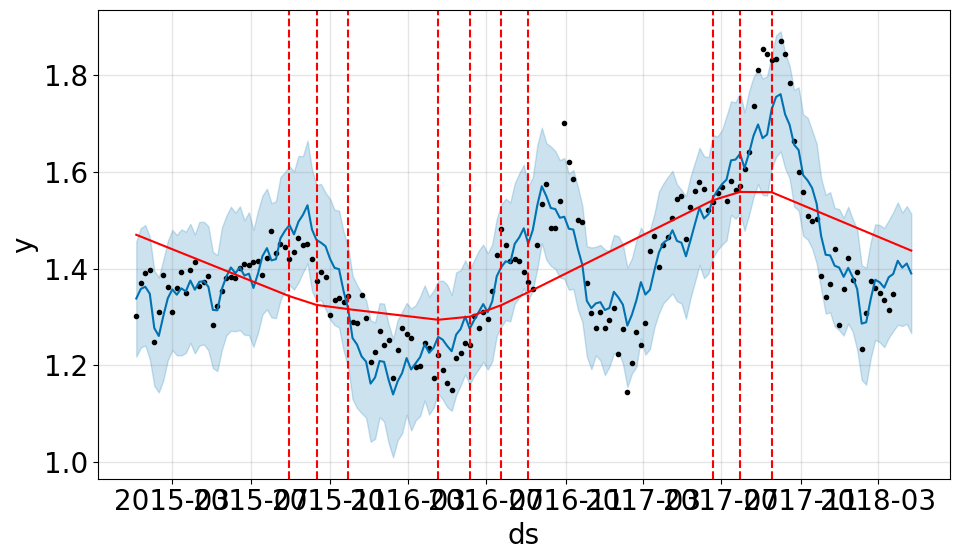

In [299]:
from prophet.plot import add_changepoints_to_plot

forecast = P.predict(future)
fig = P.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), P, forecast)

In [300]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
168,2018-03-25,1.388871,1.270789,1.516712
169,2018-04-01,1.416124,1.283895,1.536884
170,2018-04-08,1.401827,1.281106,1.515701
171,2018-04-15,1.410463,1.285754,1.529175
172,2018-04-22,1.389795,1.266154,1.513277


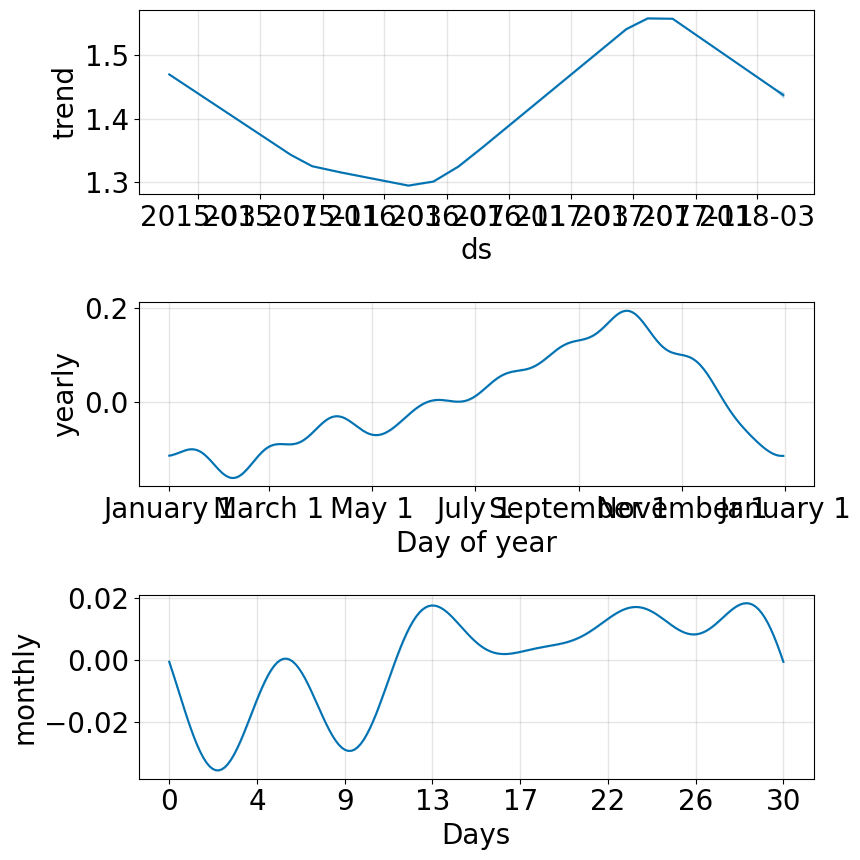

In [301]:
fig2 = P.plot_components(forecast)

In [302]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(P, initial = '365 days', period = '30 days', horizon = '30 days')
df_cv.tail()

INFO:prophet:Making 27 forecasts with cutoffs between 2016-01-05 00:00:00 and 2018-02-23 00:00:00


  0%|          | 0/27 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrapk8al/2clps2co.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrapk8al/2kxnvg5w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35226', 'data', 'file=/tmp/tmpfrapk8al/2clps2co.json', 'init=/tmp/tmpfrapk8al/2kxnvg5w.json', 'output', 'file=/tmp/tmpfrapk8al/prophet_model3rqub4jz/prophet_model-20240223064818.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:48:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:48:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrapk8al/r197mlpu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrapk8al/r3kp1_yr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
111,2018-02-25,1.417955,1.288639,1.543413,1.359630,2018-02-23
112,2018-03-04,1.424108,1.300964,1.557853,1.350185,2018-02-23
113,2018-03-11,1.423340,1.294688,1.550694,1.335093,2018-02-23
114,2018-03-18,1.450600,1.324674,1.578785,1.313704,2018-02-23
115,2018-03-25,1.452708,1.326035,1.589214,1.346852,2018-02-23


In [303]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
23,26 days,0.019486,0.139592,0.103141,0.070383,0.044928,0.067916,0.340909
24,27 days,0.010456,0.102252,0.075843,0.053189,0.032991,0.051355,0.500000
25,28 days,0.009448,0.097203,0.082455,0.057337,0.044567,0.056957,0.454545
26,29 days,0.019060,0.138056,0.116344,0.078657,0.098219,0.079657,0.363636
27,30 days,0.026787,0.163669,0.152223,0.103474,0.105595,0.104385,0.181818


In [304]:
print("MAPE:",np.mean(df_p['mape']))
print("RMSE:",np.mean(df_p['rmse']))

MAPE: 0.07715822609692184
RMSE: 0.1318466194786546


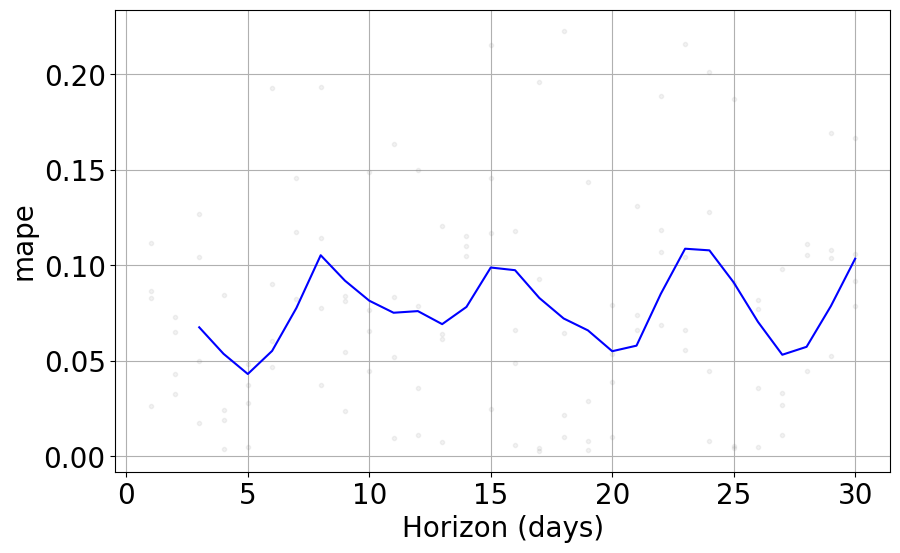

In [306]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [307]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2018-03-24") & (forecastnew['ds'] <= "2020-09-10")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2015-01-04") & (forecastnew['ds'] <= "2018-03-25")
forecastnew = forecastnew.loc[mask]

forecastedvalues

,ds,yhat
168,2018-03-25,1.388871
169,2018-04-01,1.416124
170,2018-04-08,1.401827
171,2018-04-15,1.410463
172,2018-04-22,1.389795


Red = Predicted Values, Blue = Base Values


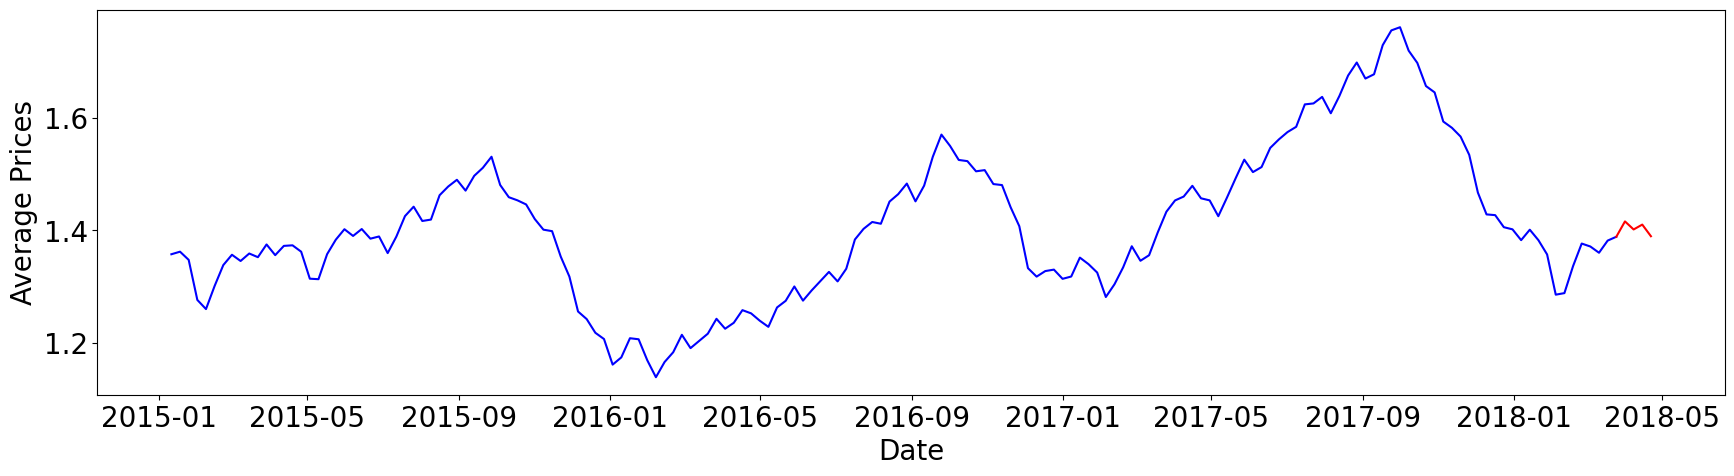

In [308]:
fig, ax1 = plt.subplots(figsize=(21, 5))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('Average Prices')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")

In [310]:
df = df.drop(['Date'], axis = 1)
df.groupby('region').size()

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

In [311]:
len(df.region.unique())

54

In [312]:
df.region.unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [313]:
regionsToRemove = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
df = df[~df.region.isin(regionsToRemove)]
len(df.region.unique())

43

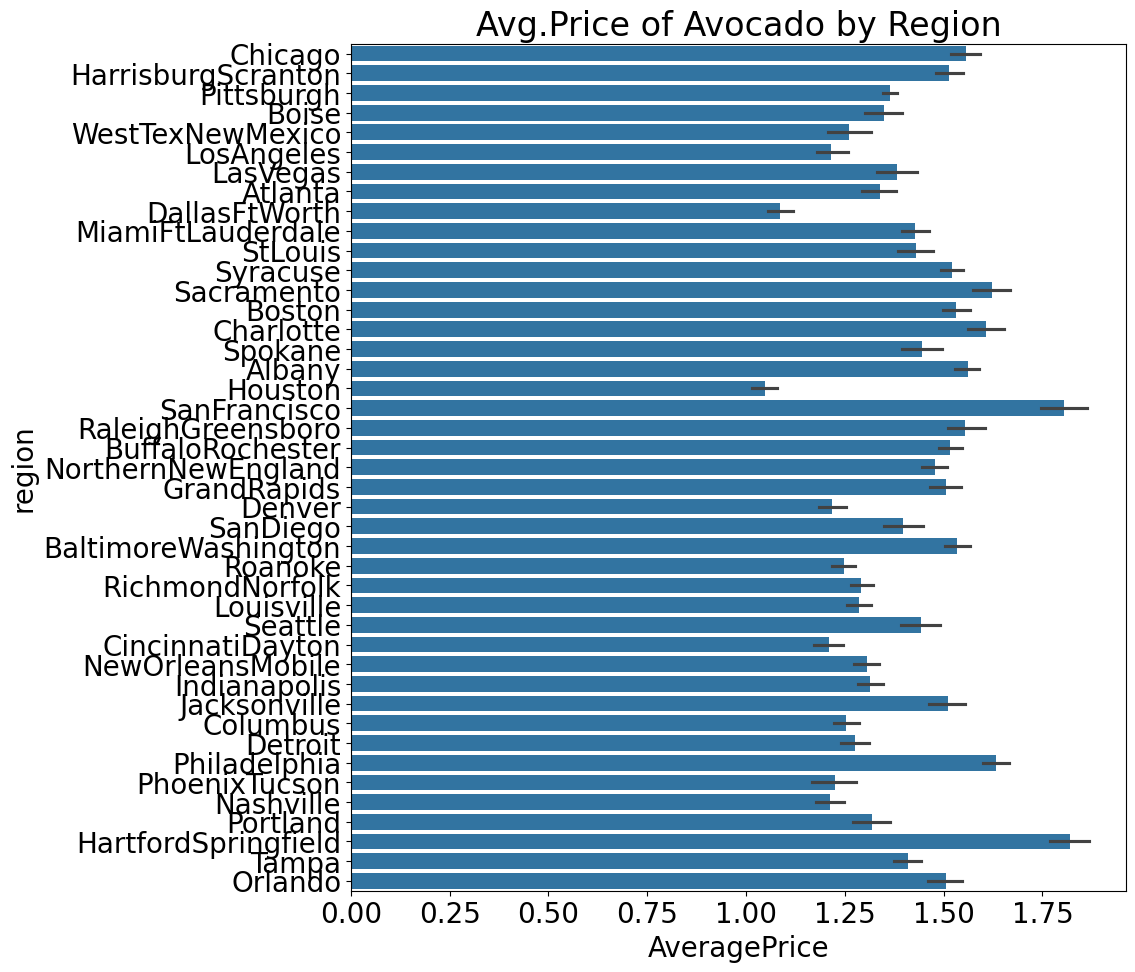

In [314]:
plt.figure(figsize=(10,11))
plt.title("Avg.Price of Avocado by Region")
Av= sns.barplot(x="AveragePrice",y="region",data= df)

In [315]:
type_counts = df.groupby('type').size()
print(type_counts)

type
conventional    7267
organic         7264
dtype: int64


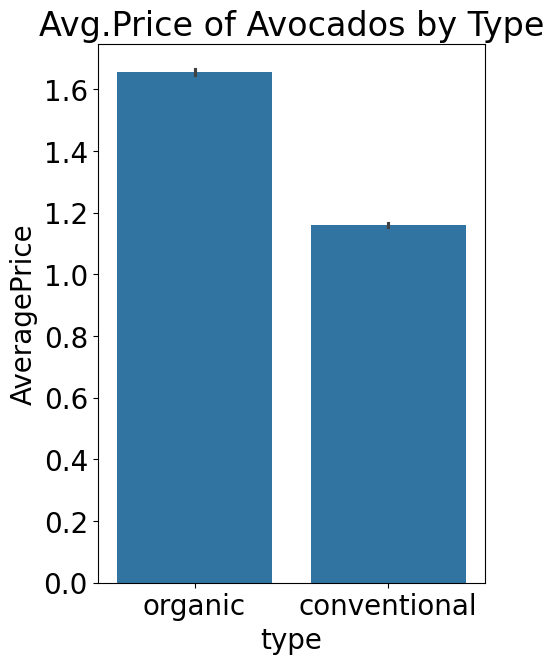

In [316]:
plt.figure(figsize=(5,7))
plt.title("Avg.Price of Avocados by Type")
Av= sns.barplot(x="type",y="AveragePrice",data= df)

In [317]:
df[['Small Hass', "Large Hass", "XLarge Hass",'Small Bags','Large Bags','XLarge Bags','Total Volume','Total Bags']].corr()

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,Total Volume,Total Bags
Small Hass,1.000000,0.505321,0.412247,0.653724,0.348216,0.454440,0.890380,0.684041
Large Hass,0.505321,1.000000,0.580107,0.563730,0.265454,0.308823,0.787495,0.577115
XLarge Hass,0.412247,0.580107,1.000000,0.437290,0.121320,0.492822,0.576676,0.429245
Small Bags,0.653724,0.563730,0.437290,1.000000,0.238270,0.658700,0.836906,0.956905
Large Bags,0.348216,0.265454,0.121320,0.238270,1.000000,0.080479,0.429051,0.509324
XLarge Bags,0.454440,0.308823,0.492822,0.658700,0.080479,1.000000,0.549505,0.622964
Total Volume,0.890380,0.787495,0.576676,0.836906,0.429051,0.549505,1.000000,0.869796
Total Bags,0.684041,0.577115,0.429245,0.956905,0.509324,0.622964,0.869796,1.000000


<Axes: >

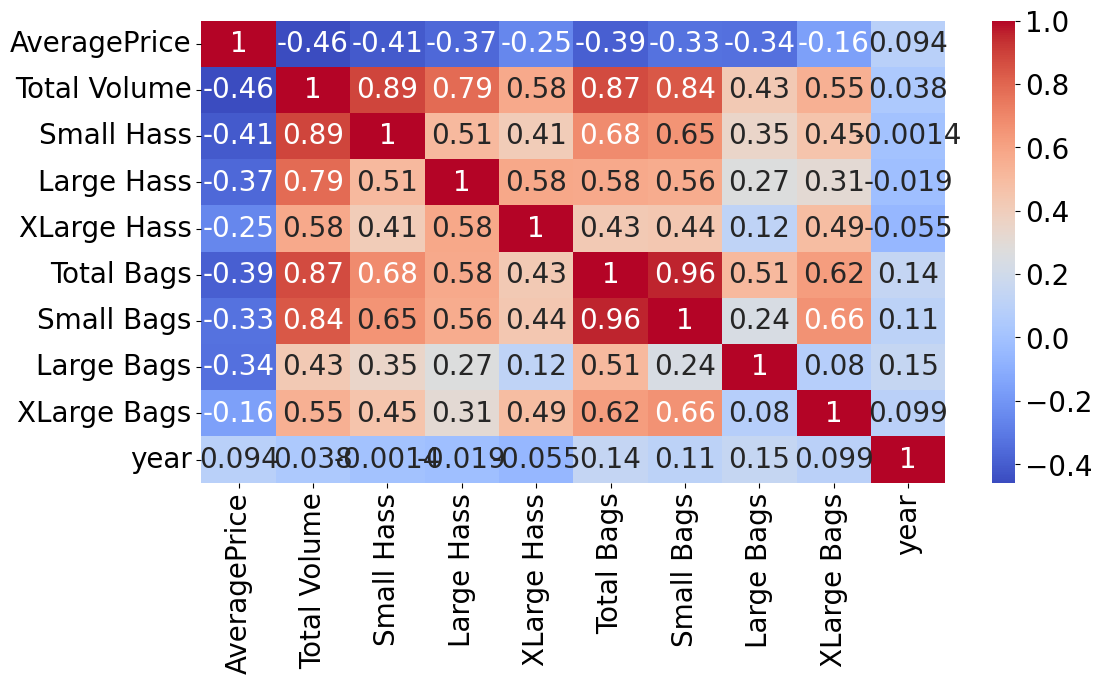

In [318]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [319]:
df_V = df.drop(['AveragePrice', 'Total Volume', 'Total Bags'], axis = 1).groupby('year').agg('sum')
df_V

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
year,,,,,,
2015,3.956835e+08,3.816794e+08,34551068.97,1.424565e+08,28409959.31,1324210.40
2016,3.373537e+08,3.684409e+08,37822298.99,2.630756e+08,80734611.45,4894984.66
2017,3.667922e+08,3.405079e+08,22968983.86,2.811956e+08,93246243.70,5384099.35
2018,1.013592e+08,8.963867e+07,5804442.33,7.920550e+07,28310113.38,1589371.50


Text(0, 0.5, '')

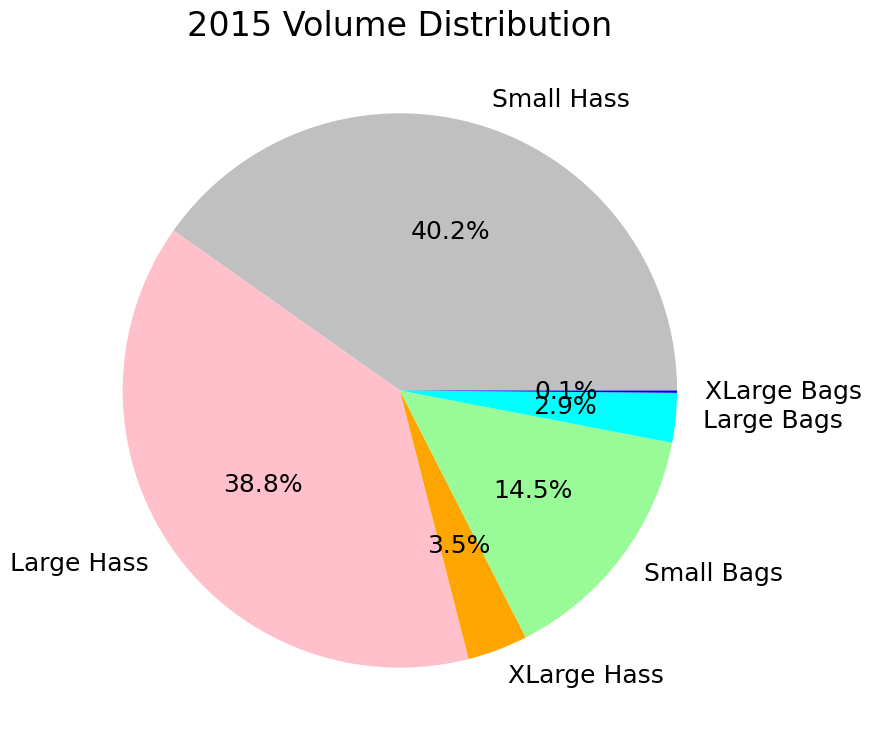

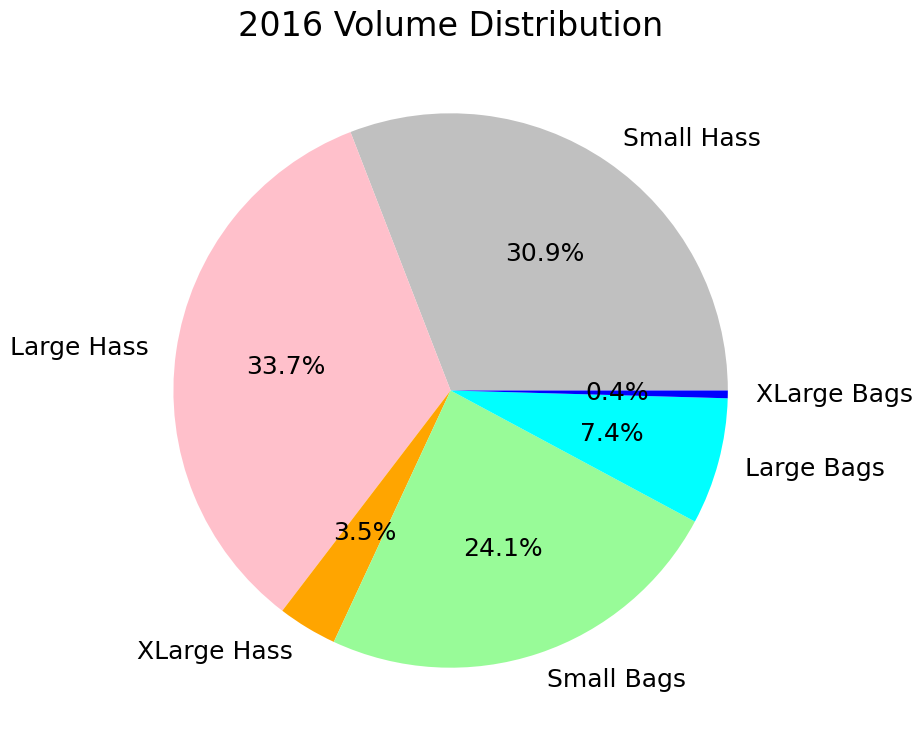

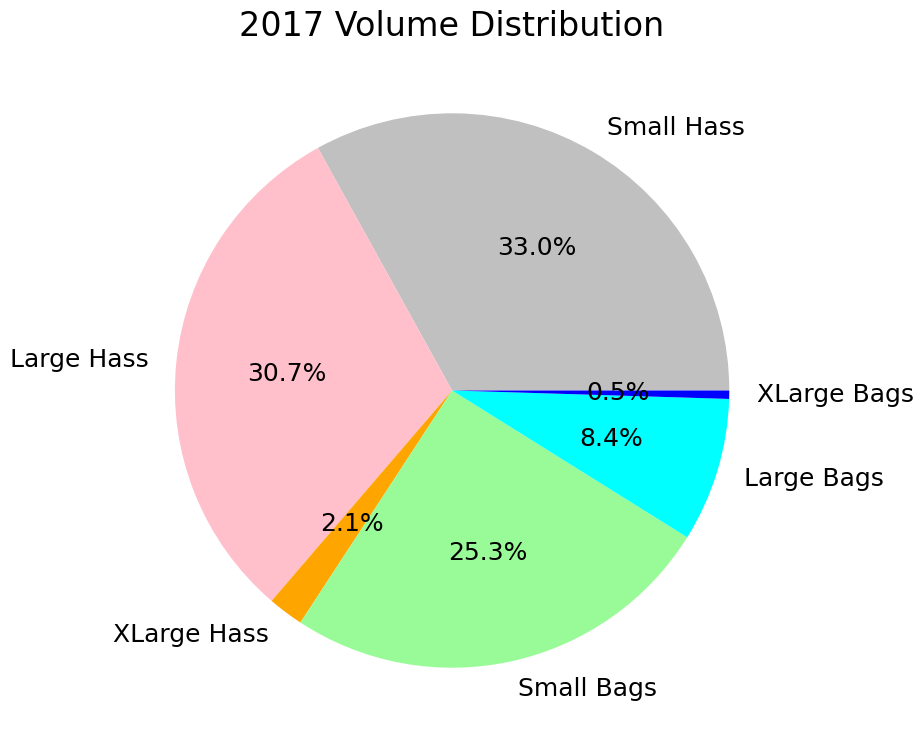

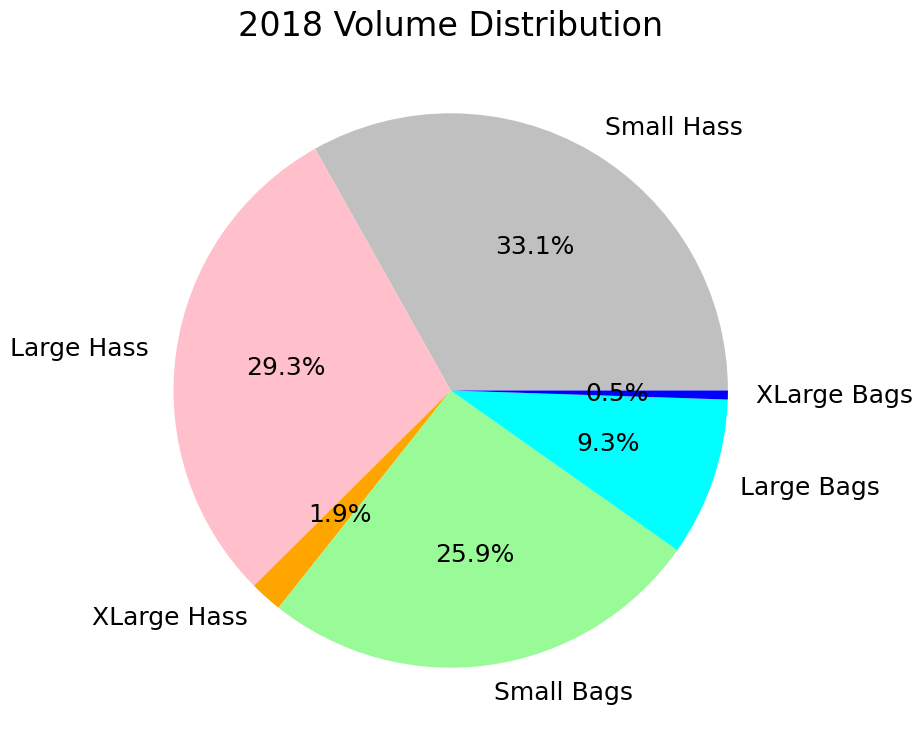

In [320]:
indexes = ['Small Hass', 'Large Hass', 'XLarge Hass', 'Small Bags', 'Large Bags', 'XLarge Bags']
series = pd.DataFrame({'2015': df_V.loc[[2015],:].values.tolist()[0],
                      '2016': df_V.loc[[2016],:].values.tolist()[0],
                      '2017': df_V.loc[[2017],:].values.tolist()[0],
                      '2018': df_V.loc[[2018],:].values.tolist()[0]}, index=indexes)
series.plot.pie(y='2015',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2015 Volume Distribution').set_ylabel('')
series.plot.pie(y='2016',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2016 Volume Distribution').set_ylabel('')
series.plot.pie(y='2017',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2017 Volume Distribution').set_ylabel('')
series.plot.pie(y='2018',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2018 Volume Distribution').set_ylabel('')

In [321]:
df = df.drop(['Total Bags'], axis = 1)
df = df.drop(['Total Volume'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14531 entries, 9593 to 8574
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  14531 non-null  float64
 1   Small Hass    14531 non-null  float64
 2   Large Hass    14531 non-null  float64
 3   XLarge Hass   14531 non-null  float64
 4   Small Bags    14531 non-null  float64
 5   Large Bags    14531 non-null  float64
 6   XLarge Bags   14531 non-null  float64
 7   type          14531 non-null  object 
 8   year          14531 non-null  int64  
 9   region        14531 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.7+ MB


In [329]:
correlations = df.corr(method='pearson')
print(correlations)

              AveragePrice  \
AveragePrice      1.000000   
Small Hass       -0.411982   
Large Hass       -0.365340   
XLarge Hass      -0.253495   
Small Bags       -0.328867   
Large Bags       -0.335109   
XLarge Bags      -0.158155   
year              0.094148   

              Small Hass  \
AveragePrice   -0.411982   
Small Hass      1.000000   
Large Hass      0.505321   
XLarge Hass     0.412247   
Small Bags      0.653724   
Large Bags      0.348216   
XLarge Bags     0.454440   
year           -0.001381   

              Large Hass  \
AveragePrice   -0.365340   
Small Hass      0.505321   
Large Hass      1.000000   
XLarge Hass     0.580107   
Small Bags      0.563730   
Large Bags      0.265454   
XLarge Bags     0.308823   
year           -0.019325   

              XLarge Hass  \
AveragePrice    -0.253495   
Small Hass       0.412247   
Large Hass       0.580107   
XLarge Hass      1.000000   
Small Bags       0.437290   
Large Bags       0.121320   
XLarge Bags      0.4

In [330]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.loc[:,'Small Hass':'XLarge Bags']= scaler.fit_transform(df.loc[:,'Small Hass':'XLarge Bags'])
df.head()

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,year,region
9593,1.49,-0.402608,-0.475043,-0.347233,-0.419915,-0.371357,-0.231149,organic,2015,Chicago
10009,1.68,-0.407686,-0.586724,-0.347233,-0.406763,-0.371357,-0.231149,organic,2015,HarrisburgScranton
1819,1.52,-0.393596,-0.331445,-0.269328,-0.335946,-0.285739,-0.231149,conventional,2015,Pittsburgh
9333,1.64,-0.408479,-0.580043,-0.347233,-0.425742,-0.366967,-0.231149,organic,2015,Boise
2807,0.75,1.700946,0.483289,0.414395,0.911829,-0.305594,-0.231149,conventional,2015,WestTexNewMexico


In [331]:
X = df.drop(['AveragePrice'], axis = 1)
y = df['AveragePrice']
y=np.log1p(y)

In [332]:
Xcat=pd.get_dummies(X[["type","region"]], drop_first = True)

In [333]:
Xnum=X[["Small Hass","Large Hass","XLarge Hass","Small Bags","Large Bags","XLarge Bags"]]

In [334]:
X= pd.concat([Xcat, Xnum], axis = 1)
X.shape

(14531, 49)

In [335]:
F_DF = pd.concat([y,X],axis=1)
F_DF.head()

,AveragePrice,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
9593,0.912283,1,0,0,0,0,0,0,1,0,...,0,0,0,0,-0.402608,-0.475043,-0.347233,-0.419915,-0.371357,-0.231149
10009,0.985817,1,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.407686,-0.586724,-0.347233,-0.406763,-0.371357,-0.231149
1819,0.924259,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.393596,-0.331445,-0.269328,-0.335946,-0.285739,-0.231149
9333,0.970779,1,0,0,1,0,0,0,0,0,...,0,0,0,0,-0.408479,-0.580043,-0.347233,-0.425742,-0.366967,-0.231149
2807,0.559616,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1.700946,0.483289,0.414395,0.911829,-0.305594,-0.231149


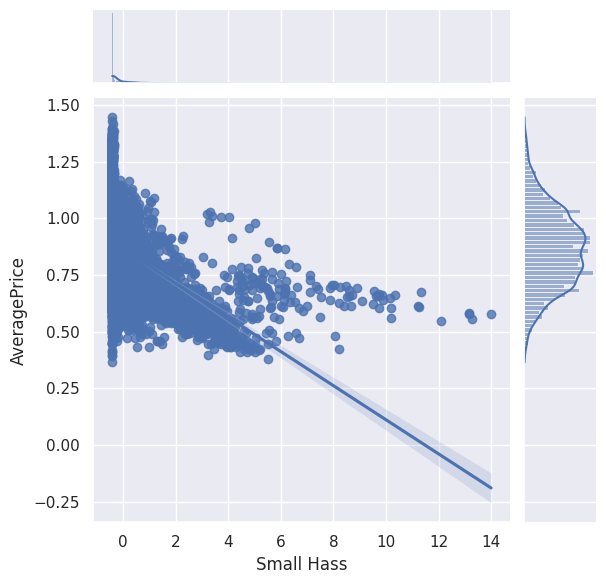

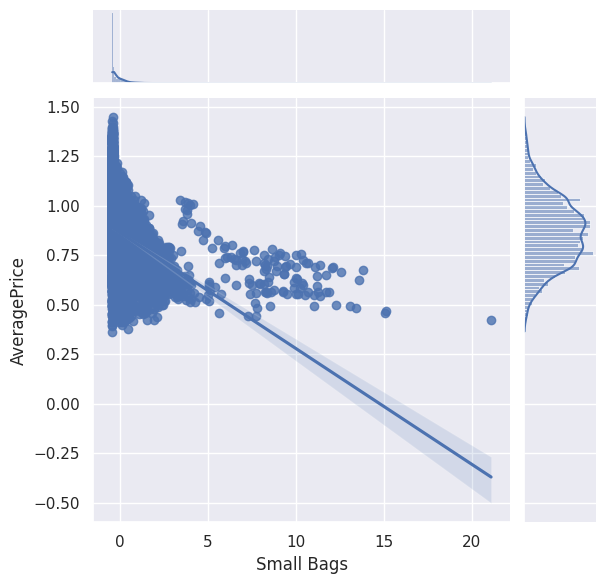

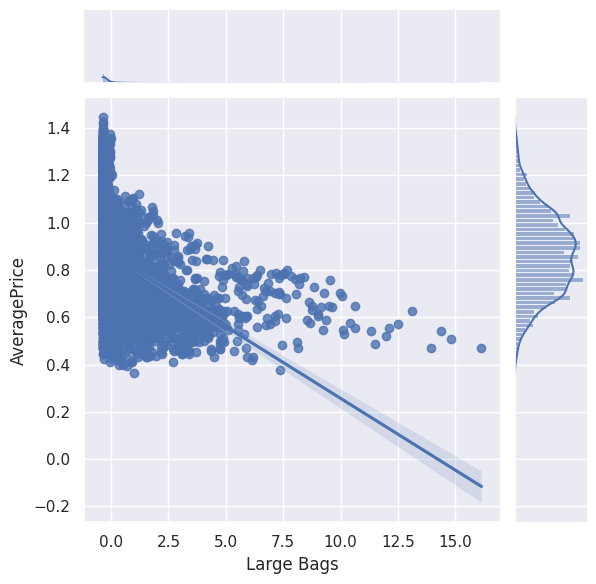

In [336]:
import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x="Small Hass", y="AveragePrice", data=F_DF, kind="reg")
sns.jointplot(x="Small Bags", y="AveragePrice", data=F_DF, kind="reg")
sns.jointplot(x="Large Bags", y="AveragePrice", data=F_DF, kind="reg")

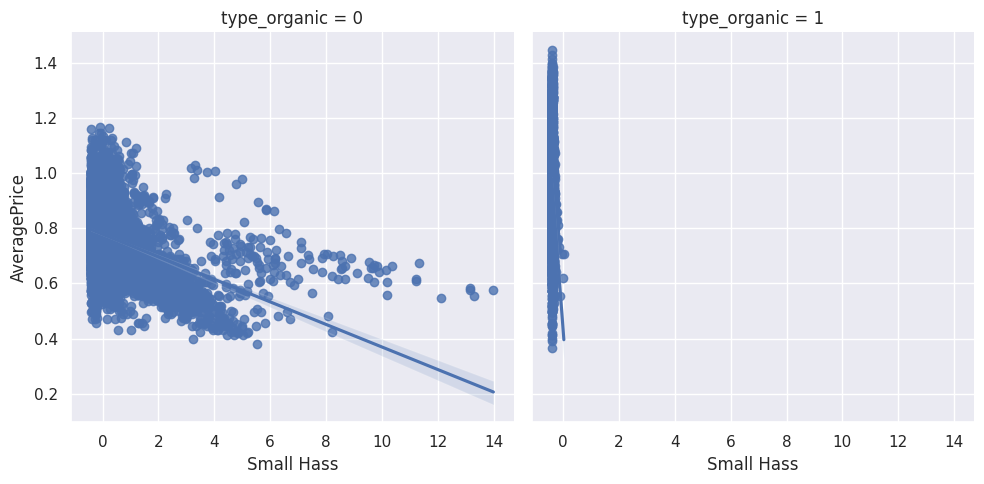

In [337]:
sns.lmplot(x="Small Hass", y="AveragePrice", col="type_organic", data=F_DF, col_wrap=2)

In [338]:
X_train=X[0:10172]
y_train=y[0:10172]
X_test=X[10172:]
y_test=y[10172:]

In [339]:
from sklearn.svm import SVR

# First, let's choose which kernel is the best for our data

for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_train, y_train)
    print(k,confidence)

linear 0.642019887912717
poly 0.7666695753740875
rbf 0.7948267556500264
sigmoid -912617.2153032974


In [340]:
Svr=SVR(kernel='rbf', C=1, gamma= 0.5)
Svr.fit(X_train,y_train)
print(Svr.score(X_train,y_train))

0.8208135882180101


In [347]:
import math
print('RMSE value of the SVR Model is:', math.sqrt(metrics.mean_squared_error(y_test,Svr.predict(X_test))))
print('MAE value of the SVR Model is:', metrics.mean_absolute_error(y_test,Svr.predict(X_test)))
print('MSE value of the SVR Model is:', metrics.mean_squared_error(y_test,Svr.predict(X_test)))

RMSE value of the SVR Model is: 0.13543908976583421
MAE value of the SVR Model is: 0.10653615540369575
MSE value of the SVR Model is: 0.0183437470365977


In [343]:
Svr.predict(X_test)[0:5]

array([0.68219164, 0.84158904, 0.89951787, 0.99830621, 1.15097328])

In [344]:
y_test[0:5]

16687    0.783902
14938    0.779325
16157    0.928219
15521    1.098612
15680    1.280934
Name: AveragePrice, dtype: float64